# Pair convergence visualization

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt

In [81]:
ORK = yf.download('ORK.OL')['2020-01-01':][['Close', 'Volume']]
DAN = yf.download('BN.PA')['2020-01-01':][['Close', 'Volume']]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [129]:
df = pd.concat([ORK.Close, DAN.Close], axis=1)[1:]
df.columns = ['ORK', 'BN']
df.head()

<IPython.core.display.Javascript object>

,ORK,BN
Date,,
2020-01-03,89.699997,74.620003
2020-01-06,89.139999,74.760002
2020-01-07,89.879997,74.059998
2020-01-08,87.720001,72.559998
2020-01-09,87.080002,72.699997


In [138]:
df = df / df.iloc[0]
df['dif'] = abs(df.ORK - df.BN) 
df.head()

,ORK,BN,diff,dif
Date,,,,
2020-01-03,1.000000,1.000000,NaN,0.000000
2020-01-06,0.993757,1.001876,inf,0.008119
2020-01-07,1.002007,0.992495,inf,0.009511
2020-01-08,0.977926,0.972393,inf,0.005533
2020-01-09,0.970792,0.974270,inf,0.003478


<AxesSubplot:xlabel='Date'>

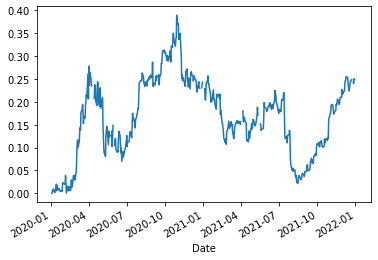

In [139]:
df['dif'].plot()

In [215]:
d1 = {'pair open': 0.4,
      'pair closed': 0.25}

df['open_close'] = np.where(df.dif > 0.25, 'pair_open', 'pair_closed')
df['plot_line'] = df_ret_cum['open_close'].map(d1)
df['plot_line_c'] = np.where(df['plot_line'] == d1['pair open'], 'blue', 'red')

df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ORK,BN,diff,dif,open_close,plot_line,plot_line_c
Date,,,,,,,
2020-01-03,1.000000,1.000000,NaN,0.000000,pair_closed,0.25,red
2020-01-06,0.993757,1.001876,inf,0.008119,pair_closed,0.25,red
2020-01-07,1.002007,0.992495,inf,0.009511,pair_closed,0.25,red
2020-01-08,0.977926,0.972393,inf,0.005533,pair_closed,0.25,red
2020-01-09,0.970792,0.974270,inf,0.003478,pair_closed,0.25,red


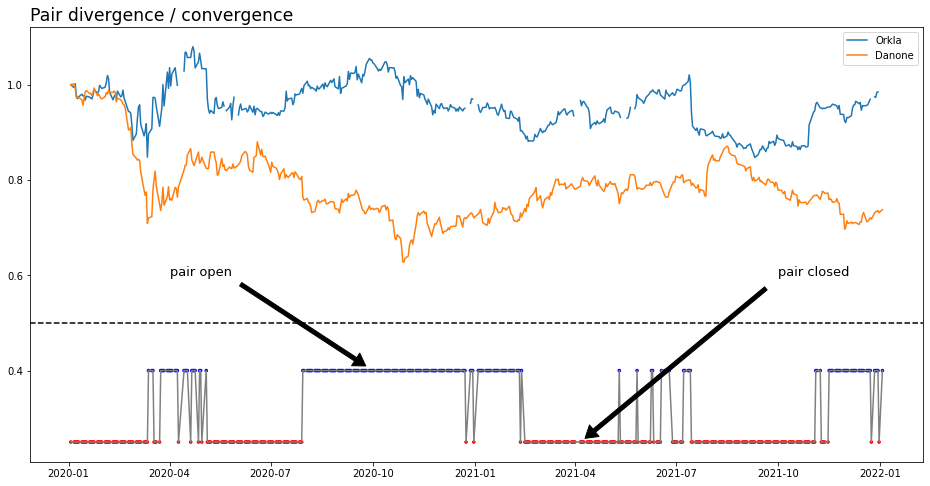

In [233]:
### the plot

fig, ax = plt.subplots(figsize=(16,8))


ax.plot(df[['ORK', 'BN']])
ax.plot(df.plot_line, c='grey')

# legger scatter plot over line-plot for å markere datapunktene
ax.scatter(df.index, df.plot_line, marker = '.',c = df.plot_line_c, s=26) 

ax.axhline(0.5, ls='--', c='k')

ax.annotate('pair open', xy=('2020-10',0.4), xytext=('2020-04', 0.6), size=13,
                        arrowprops=dict(facecolor='black',
                        shrink=0.05,
                        headwidth = 15))

ax.annotate('pair closed', xy=('2021-04',0.24), xytext=('2021-10', 0.6),  size=13,
                        arrowprops=dict(facecolor='black',
                        shrink=0.05,
                        headwidth = 15))
plt.xticks(rotation=0)
plt.legend(['Orkla', 'Danone'])
plt.title('Pair divergence / convergence', loc='left', size='xx-large')
plt.show()

(0.0, 0.5)

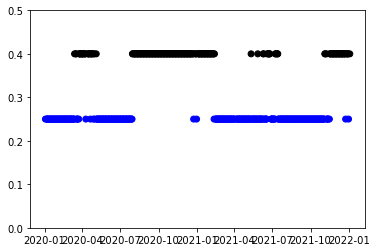

In [194]:
plt.scatter(df.index, df.plot_line, c = df.plot_line_c)
plt.ylim(0, 0.5)